In [2]:
import sklearn
import sklearn.tree
import sklearn.datasets
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.ensemble

# import urllib2
import bs4
import itertools

import pandas as pd
import pandas.tools.plotting 

import numpy as np

import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#000000'])

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
# url = 'abalone.csv'
columns = ['sex','length','diameter','height','wholeWeight','shuckedWeight','visceraWeight','shellWeight','rings']

In [4]:
data_orig = pd.read_csv(url, header=None, names=columns)
data_orig.head(3)

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [8]:
## need to convert the label
#0:infant, 1:female, 2:male

def parse_label(label):
    options = {'I': 0, 'F': 1, 'M': 2}
    return options[label]

data_orig['sex'] = data_orig['sex'].map(parse_label)
data_orig.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


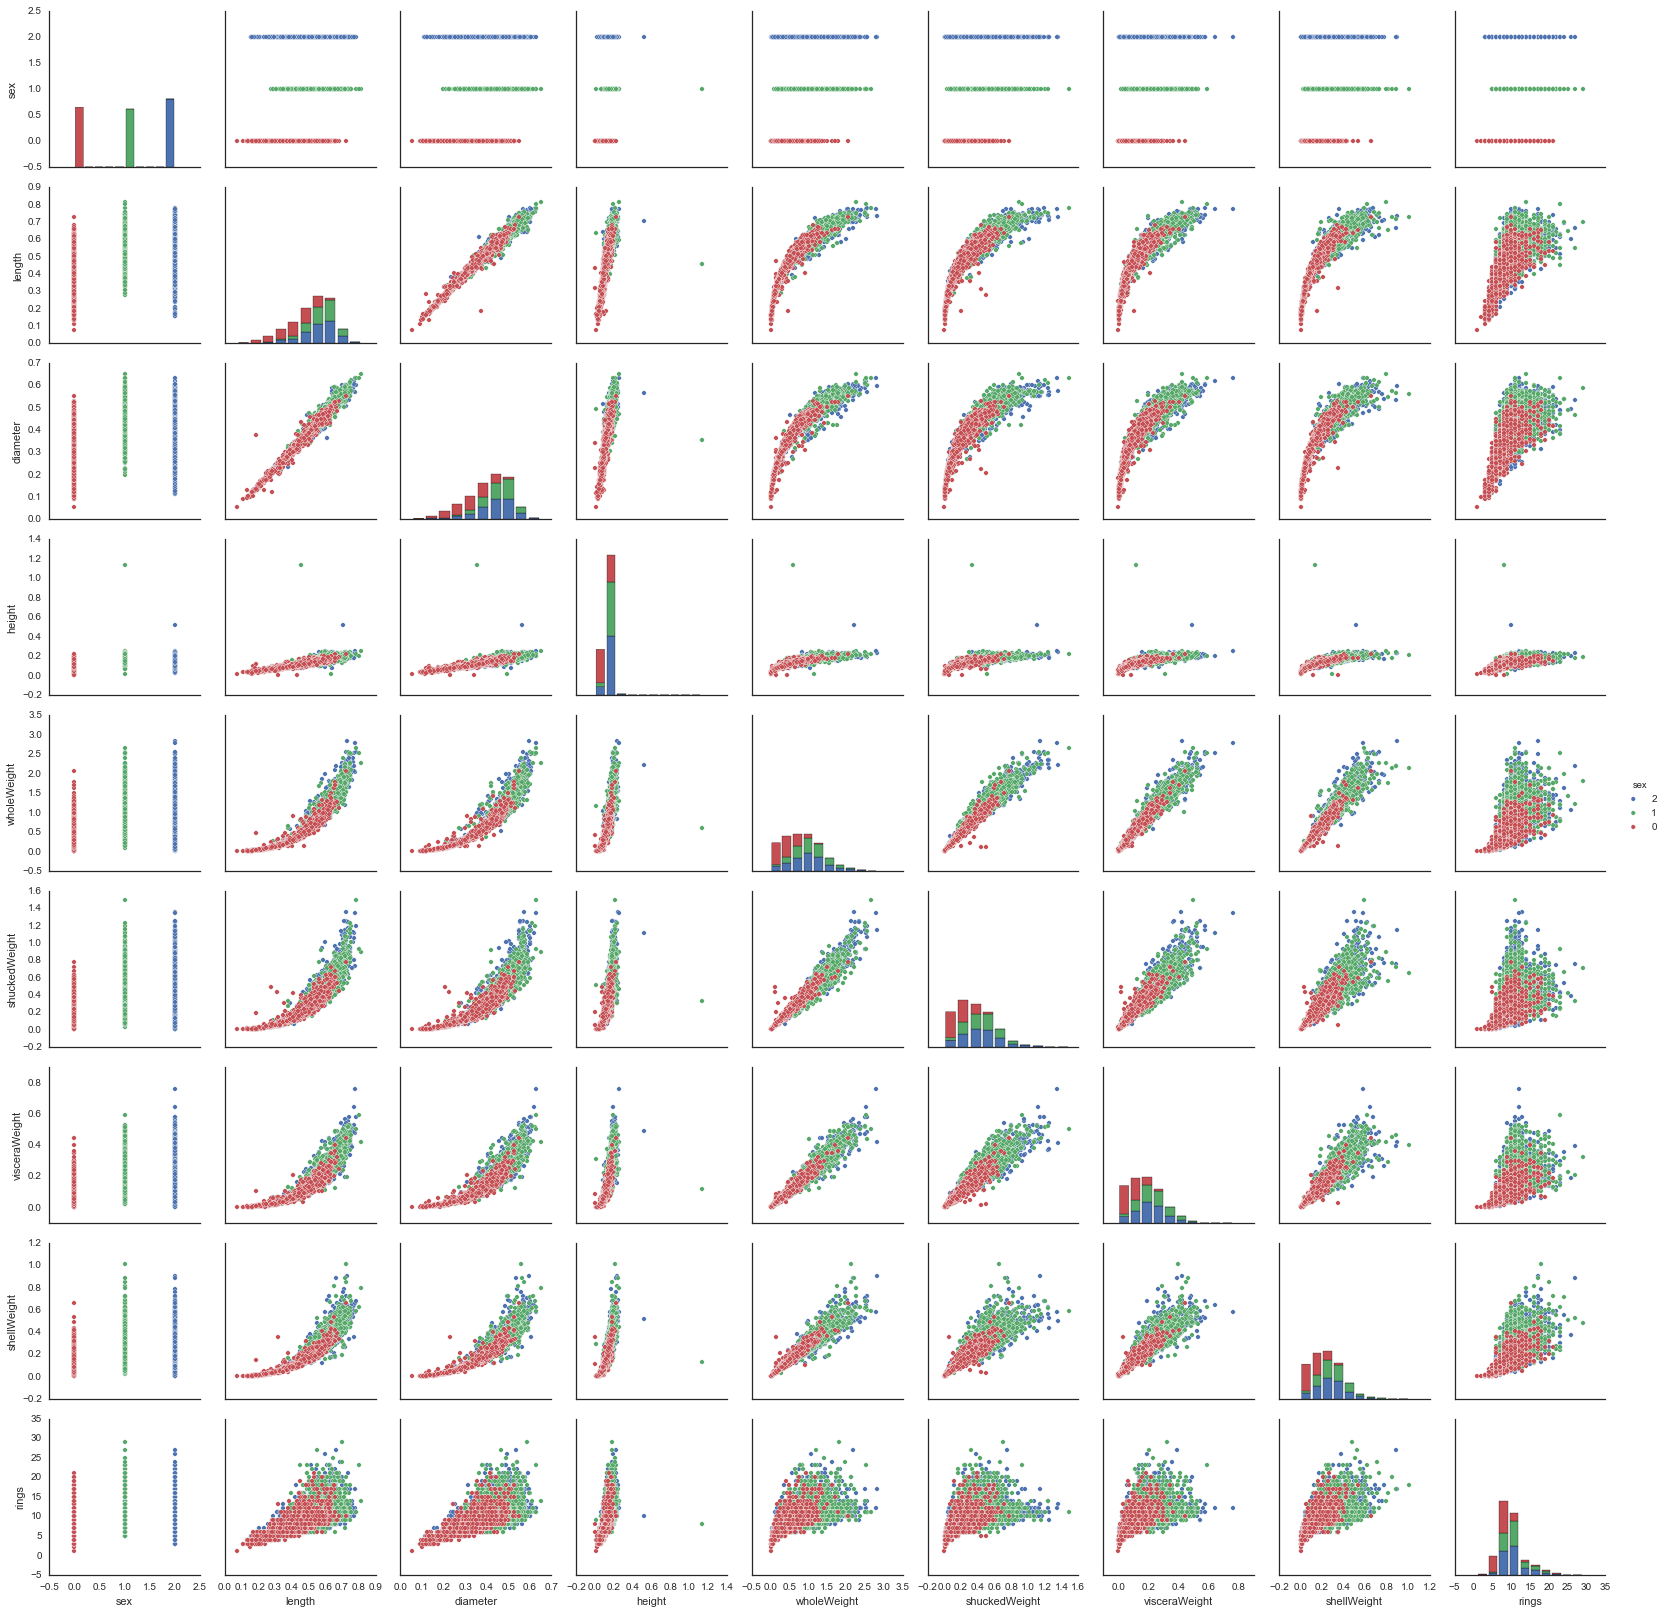

In [13]:
sns.pairplot(data_orig, hue='sex')

In [14]:
data = data_orig.copy()

def group_rings(ring):
    if ring<9: 
        return 0
    if ring == 9: 
        return 1
    if ring == 10:
        return 2
    return 3

data['rings'] = data['rings'].map(group_rings)
data.head()



,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [15]:
data_orig.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
pd.core.reshape.get_dummies?


In [174]:
one_hot_encoding = pd.core.reshape.get_dummies(data_orig.sex)
one_hot_encoding.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


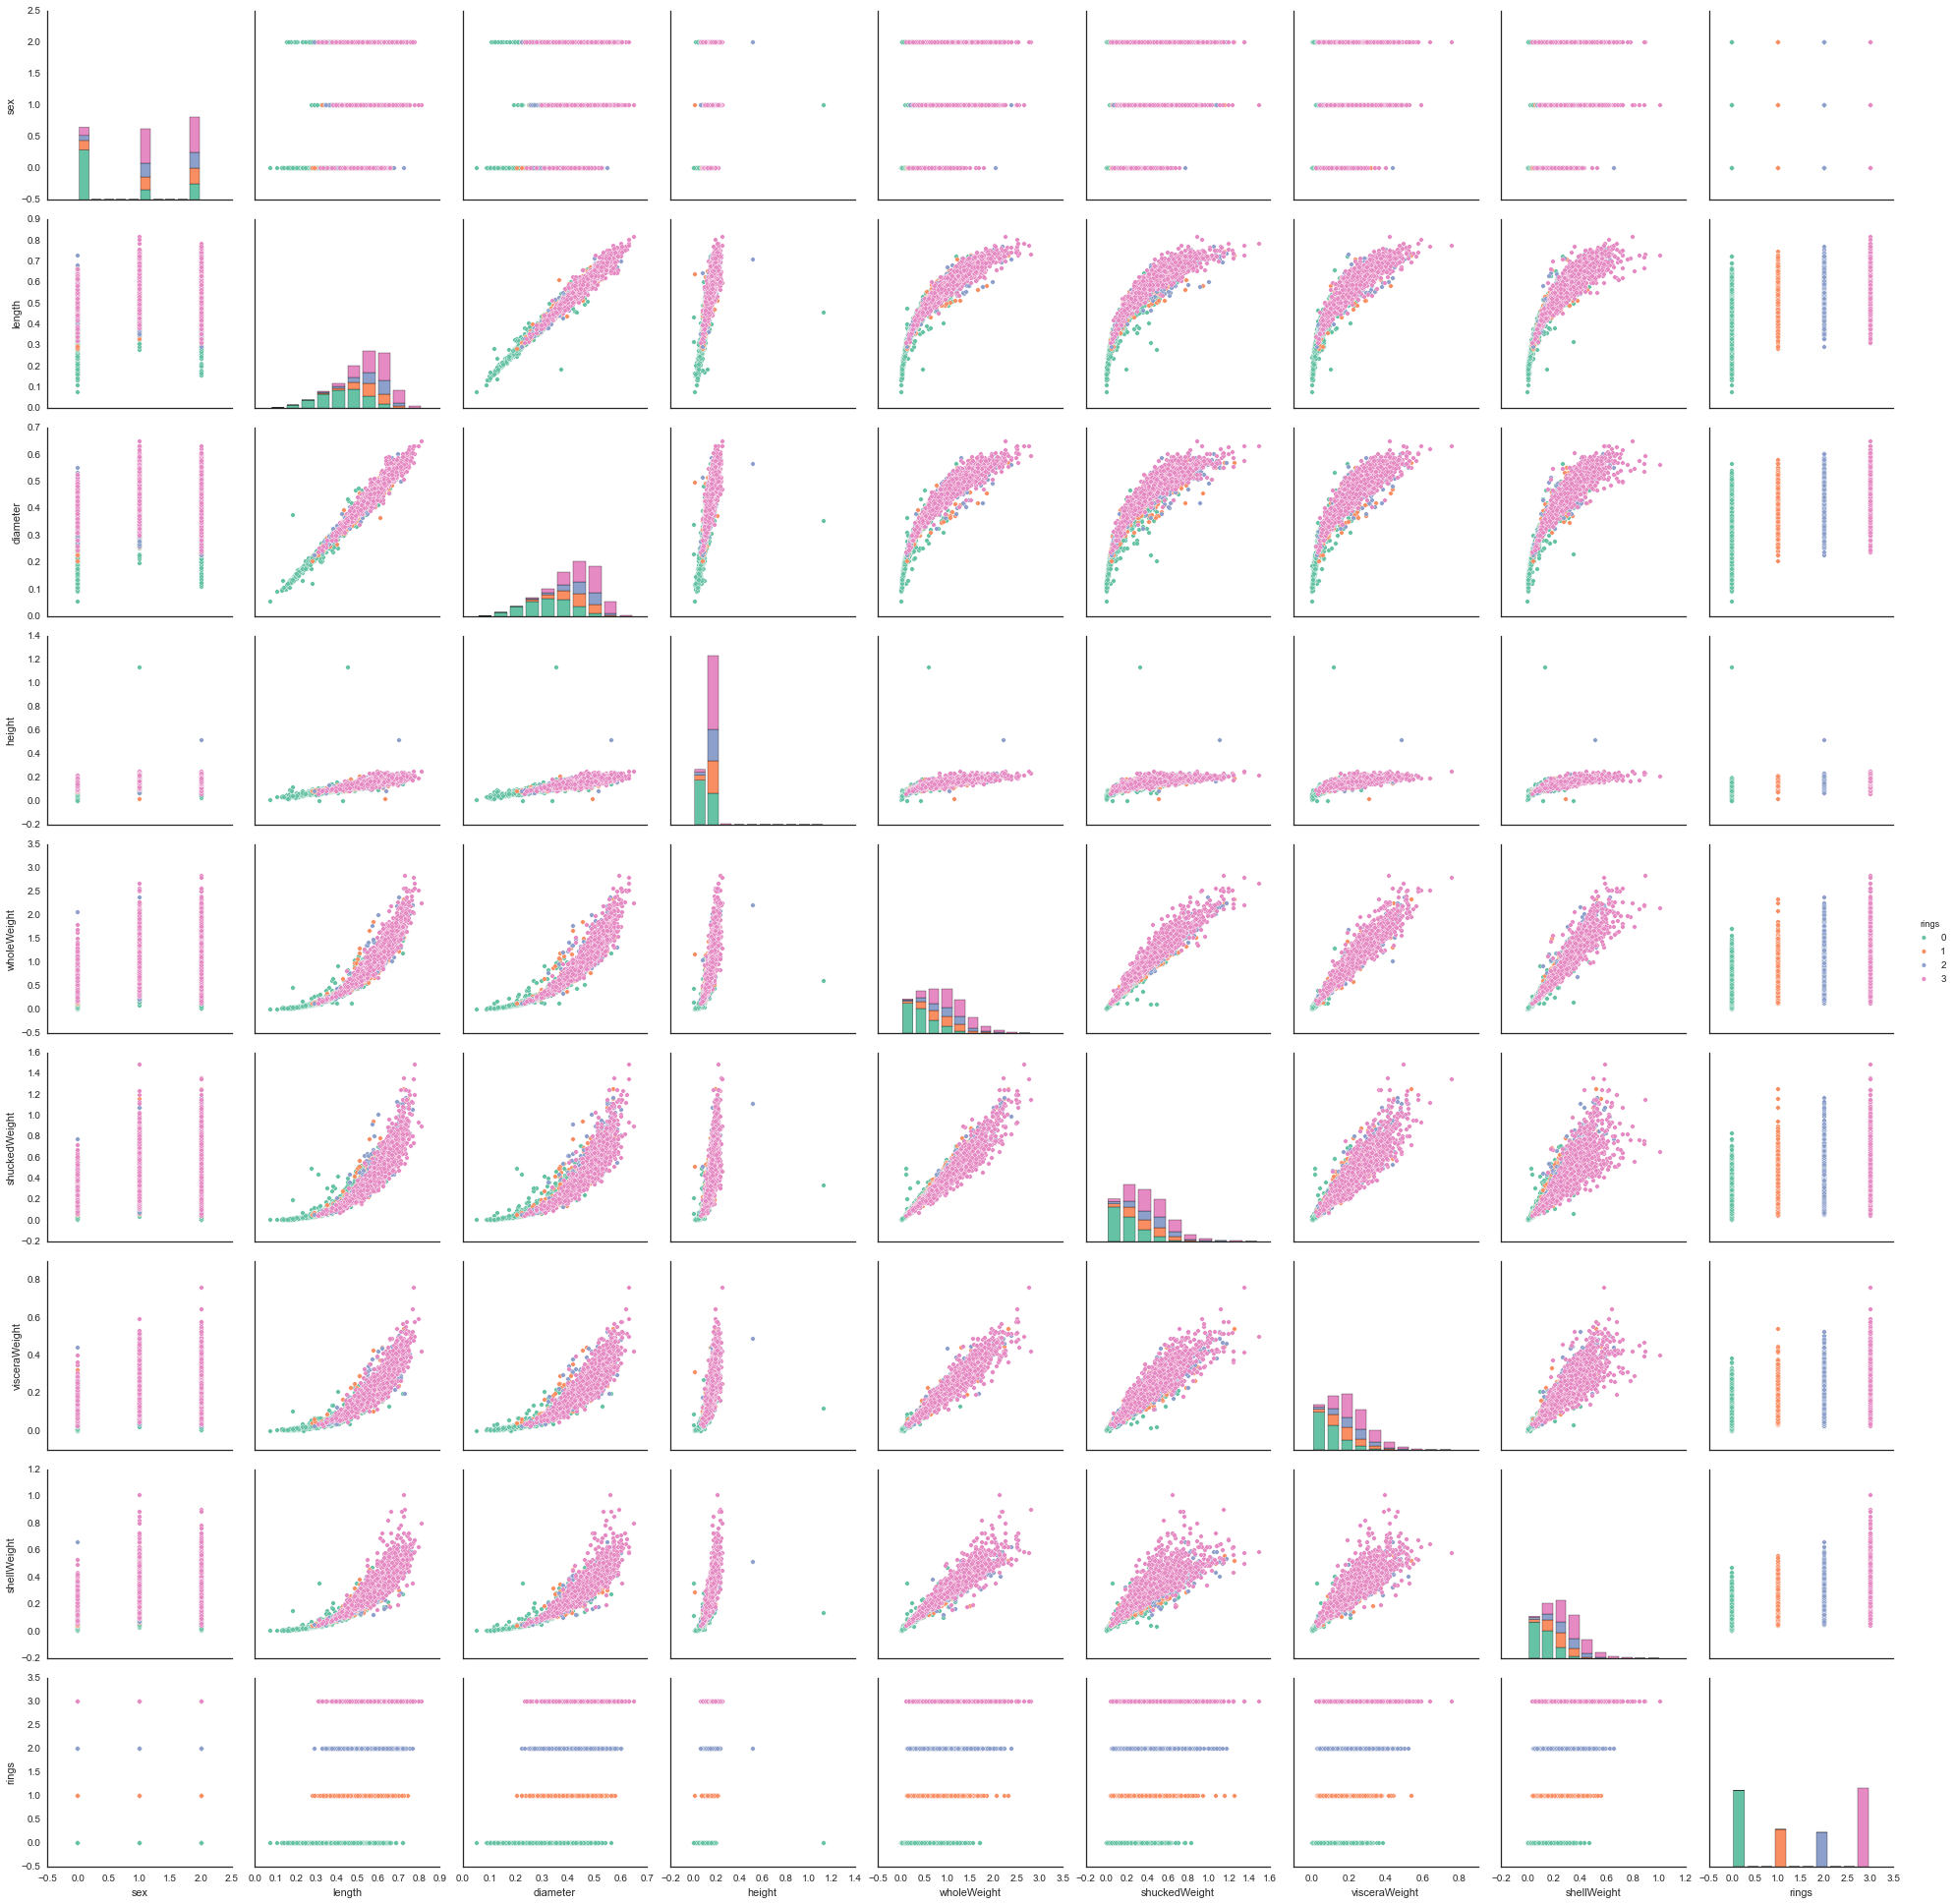

In [100]:
sns.pairplot(data, hue='rings', palette='Set2')

In [17]:
# split the data into data and label
labels_y = data.rings.copy()
data_x = data.drop(labels=['rings','sex'], axis=1)

In [34]:
data_x.shape

(4177, 7)

In [28]:
(data_x - np.mean(data_x,axis=0)).head()

,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight
0,-0.068992,-0.042881,-0.044516,-0.314742,-0.134867,-0.079594,-0.088831
1,-0.173992,-0.142881,-0.049516,-0.603242,-0.259867,-0.132094,-0.168831
2,0.006008,0.012119,-0.004516,-0.151742,-0.102867,-0.039094,-0.028831
3,-0.083992,-0.042881,-0.014516,-0.312742,-0.143867,-0.066594,-0.083831
4,-0.193992,-0.152881,-0.059516,-0.623742,-0.269867,-0.141094,-0.183831


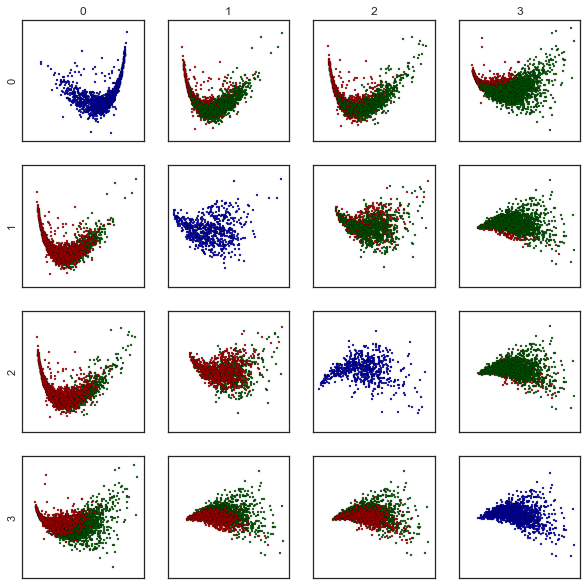

In [37]:
## plot labels against each other projected with svd
## http://peekaboo-vision.blogspot.com/2012/12/another-look-at-mnist.html

fig, plots = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

x_train_centered = data_x - np.mean(data_x,axis=0)
X_train = x_train_centered.as_matrix()
Y_train = labels_y.as_matrix()

svd = sklearn.decomposition.TruncatedSVD(n_components=2)

for i, j in itertools.product(np.arange(4), repeat=2):
    X_ = X_train[(Y_train == i) + (Y_train == j)]
    y_ = Y_train[(Y_train == i) + (Y_train == j)]
    
    X_t = svd.fit_transform(X_)

    X_t_i = X_t[(y_ == i)]
    X_t_j = X_t[(y_ == j)]

    if i < j:
        plots[i, j].scatter(X_t_i[:, 0], X_t_i[:, 1], c='r', s=4.0)
        plots[i, j].scatter(X_t_j[:, 0], X_t_j[:, 1], c='g', s=4.0)
        plots[i, j].set_xticks(())
        plots[i, j].set_yticks(())
        
        plots[j, i].scatter(X_t_j[:, 0], X_t_j[:, 1], c='g', s=4.0)
        plots[j, i].scatter(X_t_i[:, 0], X_t_i[:, 1], c='r', s=4.0)
        plots[j, i].set_xticks(())
        plots[j, i].set_yticks(())    
    elif i==j:
        plots[i, j].scatter(X_t_i[:, 0], X_t_i[:, 1], c='b', s=4.0)
        plots[i, j].set_xticks(())
        plots[i, j].set_yticks(())    

    if i == 0:
        plots[i, j].set_title(j)
        plots[j, i].set_ylabel(j)

In [38]:
decisionTree = sklearn.tree.DecisionTreeClassifier()
decisionTree.fit(data_x, labels_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [82]:
print(decisionTree.feature_importances_)
print("\n" ,data_x.columns)

[ 0.09459805  0.07201075  0.09665407  0.10942005  0.1511777   0.14241426
  0.33372512]

 Index(['length', 'diameter', 'height', 'wholeWeight', 'shuckedWeight',
       'visceraWeight', 'shellWeight'],
      dtype='object')


In [44]:
with open("tree.dot", "w") as output_file:
    sklearn.tree.export_graphviz(decisionTree, feature_names=data_x.columns, out_file=output_file)

In [134]:
## execute dot to convert .dot file to .png on the command line

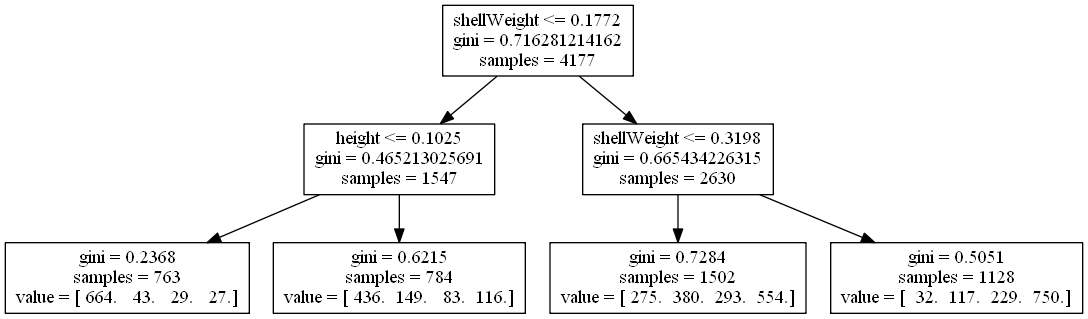

In [45]:
from IPython.core.display import Image 
Image(filename='tree.png') 

In [47]:
scores = sklearn.cross_validation.cross_val_score(decisionTree, data_x, labels_y, cv=10)
print(np.mean(scores), np.std(scores))

0.494826947781 0.0278410394214


In [49]:
bagging = sklearn.ensemble.BaggingClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(bagging, data_x, labels_y, cv=10)
print(np.mean(scores), np.std(scores))

0.549206512884 0.0165763874925


In [50]:
bagging = sklearn.ensemble.BaggingClassifier(n_estimators=50)
scores_bagging = sklearn.cross_validation.cross_val_score(bagging, data_x, labels_y, cv=10)
print(np.mean(scores_bagging), np.std(scores_bagging))

0.570978775256 0.0178654500772


In [51]:
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(forest, data_x, labels_y, cv=10)
print(np.mean(scores), np.std(scores))

0.570248453065 0.022882536592


In [52]:
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
scores = sklearn.cross_validation.cross_val_score(forest, data_x, labels_y, cv=10)
print(np.mean(scores), np.std(scores))

0.581734114081 0.0282441895993


In [55]:
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(forest, data_x, labels_y, cv=10)
print(np.mean(scores), np.std(scores))

0.559973982451 0.0273918261289


In [56]:
scores_tree = sklearn.cross_validation.cross_val_score(decisionTree, data_x, labels_y, cv=10)

bagging = sklearn.ensemble.BaggingClassifier(n_estimators=100)
scores_bagging = sklearn.cross_validation.cross_val_score(bagging, data_x, labels_y, cv=10)

forest = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
scores_forest = sklearn.cross_validation.cross_val_score(forest, data_x, labels_y, cv=10)

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


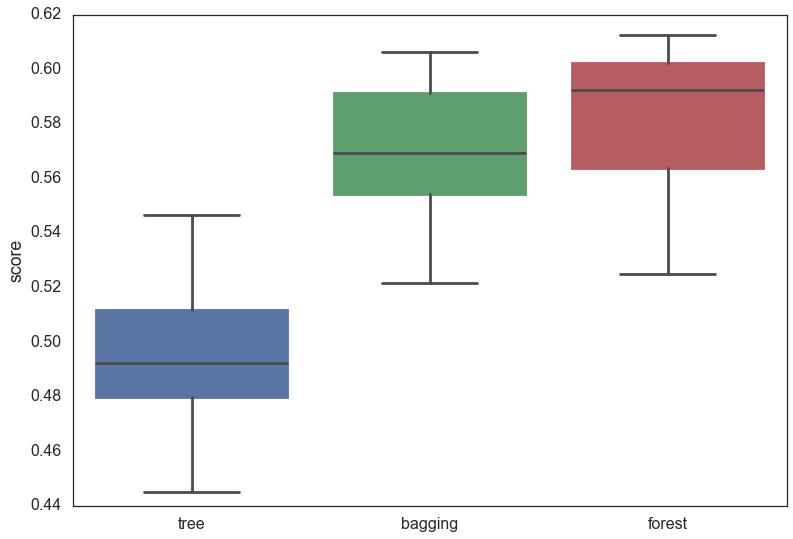

In [76]:
all_scores = pd.DataFrame(np.transpose([scores_tree, scores_bagging, scores_forest]))
all_scores.columns = ['tree','bagging','forest']
sns.boxplot(data=all_scores)
plt.ylabel("score")

